In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

In [14]:
# Load dataset
df = pd.read_csv('OnlineNewsPopularity.csv')
df.columns = [col.strip() for col in df.columns]  # Remove leading/trailing whitespace

In [15]:
print("Shape of dataset:", df.shape)
print("Sample rows:")
display(df.head())

Shape of dataset: (39644, 61)
Sample rows:


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [16]:
# Drop irrelevant column
df.drop("url", axis=1, inplace=True)

In [18]:
display(df.head())

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [19]:
# Assigning target column
target_col = "shares"
print("\nTarget column summary:")
print(df[target_col].describe())


Target column summary:
count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


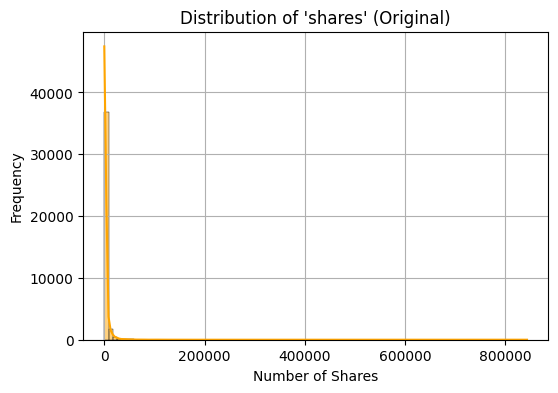

In [24]:
# Histogram of shares
plt.figure(figsize=(6, 4))
sns.histplot(df['shares'], bins=100, kde=True, color='orange')
plt.title("Distribution of 'shares' (Original)")
plt.xlabel("Number of Shares")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# shares is highly skewed so we need to apply logarithmic transfomation to normalize it 

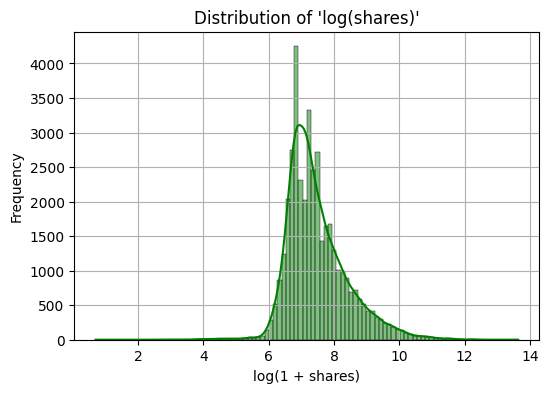

In [27]:
# Apply log(1 + x) to handle zero shares too
df['log_shares'] = np.log1p(df['shares'])

# Compare new distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['log_shares'], bins=100, kde=True, color='green')
plt.title("Distribution of 'log(shares)'")
plt.xlabel("log(1 + shares)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

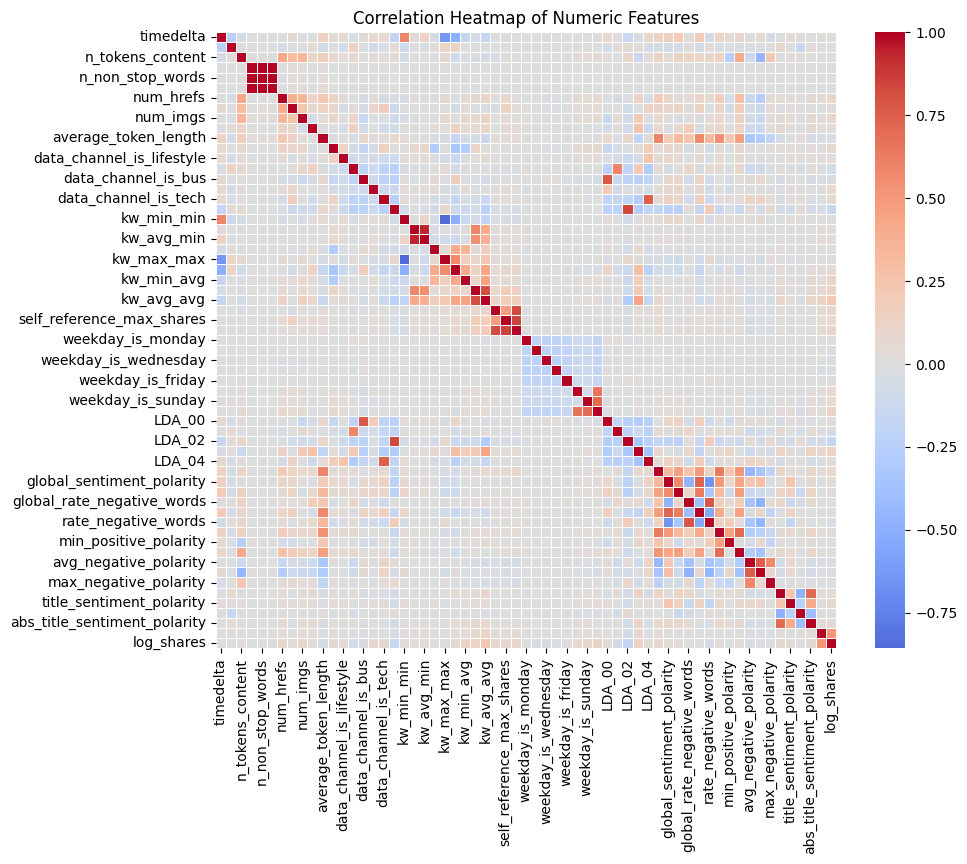

In [29]:
# Focus only on numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot full heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:
# Correlation of all features with log_shares
target_corr = corr_matrix['log_shares'].sort_values(ascending=False)
print("Top correlations with log_shares:\n")
print(target_corr.head(10))  # Top positive
print("\nLowest (most negative) correlations:\n")
print(target_corr.tail(10))  # Top negative

# high positive values of correlation means as feature value increases, target value also increases
# low negative values of correlation means as feature value decreases, target value also decrease

Top correlations with log_shares:

log_shares                    1.000000
shares                        0.510181
kw_avg_avg                    0.221822
LDA_03                        0.126037
is_weekend                    0.114391
kw_max_avg                    0.109343
kw_min_avg                    0.108850
num_hrefs                     0.105142
num_imgs                      0.091519
self_reference_avg_sharess    0.087238
Name: log_shares, dtype: float64

Lowest (most negative) correlations:

data_channel_is_bus             -0.030587
weekday_is_tuesday              -0.031095
avg_negative_polarity           -0.034323
weekday_is_wednesday            -0.036609
average_token_length            -0.045321
rate_negative_words             -0.048176
LDA_01                          -0.052992
data_channel_is_entertainment   -0.082531
data_channel_is_world           -0.151685
LDA_02                          -0.165076
Name: log_shares, dtype: float64


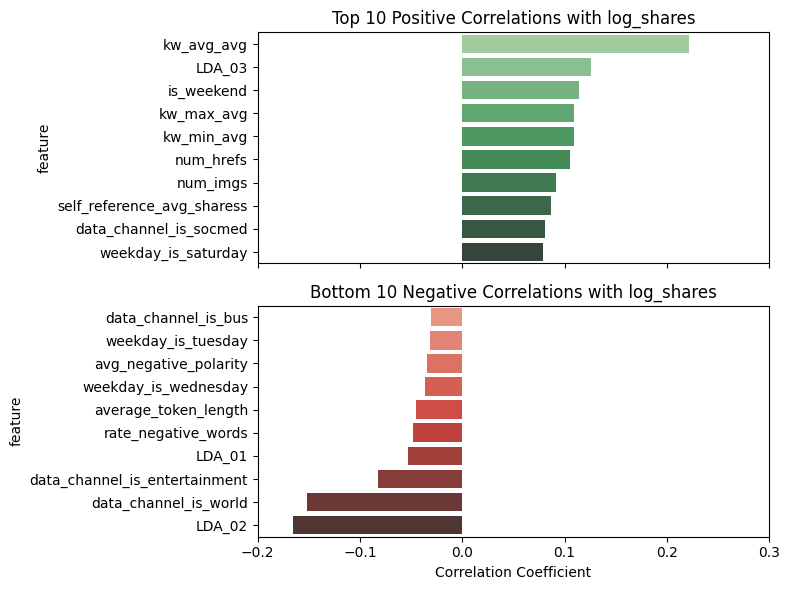

In [33]:
# Drop the target and dependent variable from top correlations
top_corr = target_corr.drop(['log_shares', 'shares']).head(10)
bottom_corr = target_corr.tail(10)

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Convert to DataFrame for hue assignment
top_df = top_corr.reset_index()
top_df.columns = ['feature', 'correlation']

bottom_df = bottom_corr.reset_index()
bottom_df.columns = ['feature', 'correlation']

# Plot top correlations
sns.barplot(
    data=top_df, x='correlation', y='feature', hue='feature',
    palette='Greens_d', ax=ax[0], legend=False
)
ax[0].set_title('Top 10 Positive Correlations with log_shares')
ax[0].set_xlim(-0.2, 0.3)

# Plot bottom correlations
sns.barplot(
    data=bottom_df, x='correlation', y='feature', hue='feature',
    palette='Reds_d', ax=ax[1], legend=False
)
ax[1].set_title('Bottom 10 Negative Correlations with log_shares')
ax[1].set_xlabel('Correlation Coefficient')

plt.tight_layout()
plt.show()


In [ ]:
# Drop non-predictive columns
df_cleaned = df.drop(columns=['shares'])
#drop shares column as we have log(shares) as target col

In [36]:
# Features and target
X = df_cleaned.drop(columns=['log_shares'])  # input features, dropping log_shares as it is target and not required in input features
y = df_cleaned['log_shares']                # target variable

In [38]:
# splitting train test dataset in 80 - 20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
# normalizing the values of numeric features as part of feature scaling so they fall in similar range
# as part of standard scaler we are normalizing all features such that mean of each feature is 0 and standard deviation of each feature is 1

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same transformation on test data
X_test_scaled = scaler.transform(X_test)

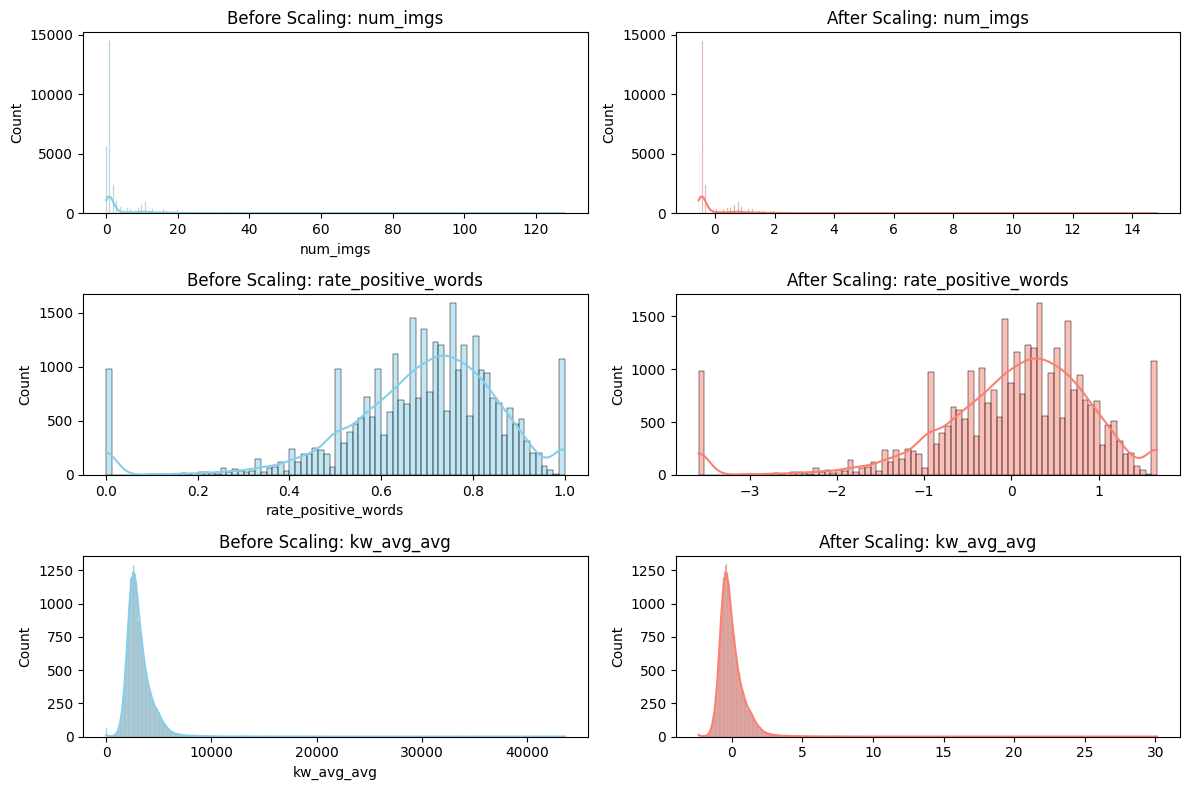

In [ ]:
# visualization of before and after the feature scaling ()
# Pick some features to visualize
features_to_plot = ['num_imgs', 'rate_positive_words', 'kw_avg_avg']

fig, axes = plt.subplots(len(features_to_plot), 2, figsize=(12, 8))

for i, feature in enumerate(features_to_plot):
    # Before scaling (using the original X_train)
    sns.histplot(X_train[feature], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Before Scaling: {feature}')
    
    # After scaling (X_train_scaled is a numpy array, so convert to DataFrame temporarily)
    sns.histplot(
        pd.Series(X_train_scaled[:, X_train.columns.get_loc(feature)]), 
        kde=True, ax=axes[i, 1], color='salmon'
    )
    axes[i, 1].set_title(f'After Scaling: {feature}')

plt.tight_layout()
plt.show()


In [43]:
# Initialize linear regression model
lr_model = LinearRegression()

# Fit model on training data
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [44]:
# Predict log_shares for test set
y_pred = lr_model.predict(X_test_scaled)

In [46]:
# model evaluation 
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² score: 0.1272
RMSE: 0.8649


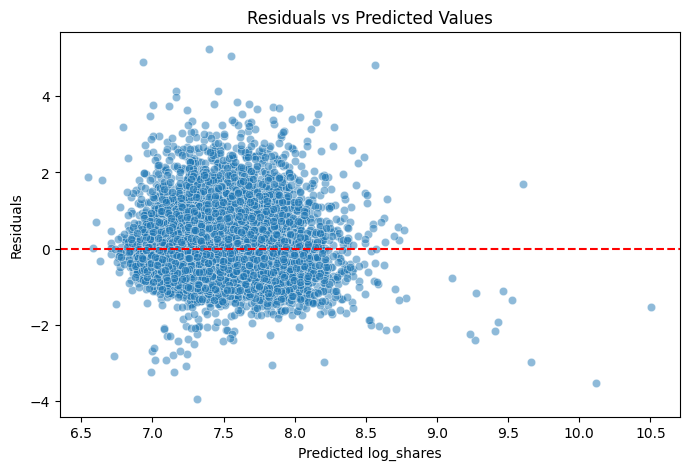

In [47]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted log_shares')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()